Hi,
Thanks for opening my notebook.
Now we are going to how to do a image processing using CNN and ANN.

The dataset used in this Notebook is mnist dataset from keras Library

In [1]:
#importing the required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#MNIST dataset can be downloaded from keras
from tensorflow.keras.datasets import mnist

In [3]:
#MNIST dataset has been already splitted as x_train,y_train,x_test and y_test
#just download the mnist data set from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
#mnist data set images are greyscale
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
#Checking the each shape of the train and test data
#it shows x_train data has 60,000 sample images of pixel height 28 and width 28. 
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
#Exploring the first sample in train data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

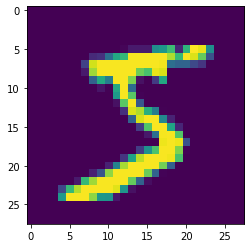

In [8]:
#Visualizing the first train data as image
#mnist data set images are greyscale
#then why the below shown images are in colour purple and yellow
#technically we can call any color mapping to display the image
#default cmap in matplotlib is viridis and it ranges from Purple to Yellow,
#So 0 to be purple and 255 to be yellow or vice versa is shown below
#we can replace with any color mapping as we need

#Refer this link https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
plt.imshow(x_train[0])

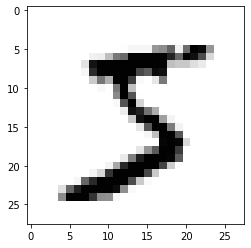

In [9]:
plt.imshow(x_train[0],cmap='Greys')

In [10]:
#y contains the array of numbers
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

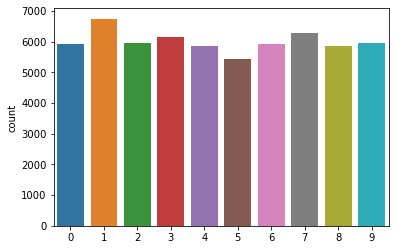

In [11]:
#Trying to get the number classes in train and test data
#Basically MNIST dataset contains numbers from 0 to 9.
#So,totally 10 classes
sns.countplot(y_train)

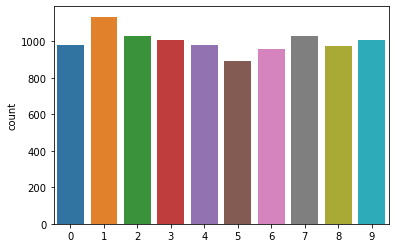

In [12]:
sns.countplot(y_test)

In [13]:
#conversion to one hot encoding
#My output classes are from 0 to 9 and in the format of 1D array (Looks like regression numbers)
#If same format is fed into the model, the model will consider it has regression problem.
#To avoid that it has to be converted to the categorical variable in 0's and 1's format which will be understandable by our CNN.
#Basically, this format is similar to creating dummy variable
from tensorflow.keras.utils import to_categorical

In [14]:
#conversion of y to a categorical 
#number of classes is 10
y_test_cat=to_categorical(y_test,10)
y_train_cat=to_categorical(y_train,10)

In [15]:
#The first data in y
#The classes are from 0 to 9
# 1 at index 7 represents the number is 7
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
#first values before conversion
y_test[0]

7

In [17]:
#The array format clearly shows value 0 represents white and 255 represents black
#the inbetween values represents greyscale
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
print(x_train[0].min())
print(x_train[0].max())

0
255


# normalize the X data

In [19]:
#We should normalize the X data
#Before proceeding, the x data need to scaled down to 0 to 1
#Min value is 0 and max is 255
#So, dividinf the x by 255 will scale all the values between 0 to 1
x_train_scale=x_train/255
x_test_scale=x_test/255

In [20]:
#scaled data
x_test_scale[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Train data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [21]:
#The important points to remember with CNN is, the input data has to in 4D
#(Number of samples, pixel height, pixel width, number of color channel)
#In our case 
#number of train samples = 60000
#Pixel height of each image = 28
#Pixel width of each image = 28
#Number of color channel = 1 (Since the mnist dataset contains only greyscale images)
#for a color image number of color channel will be 3 (Red, green and blue)
x_train_scale=x_train_scale.reshape(60000,28,28,1)
x_test_scale=x_test_scale.reshape(10000,28,28,1)

In [22]:
#Importing the sequential, since the is going to be created layer by layers
#Importing the required layers to be used for building CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,AvgPool2D,Flatten,Dense,Dropout
#CONV2D for a convolution layer of grey scale images
#Maxpool2D and AvgPool2D for pooling layers
#Dense for fully connected layer
#Dropout for Dropout layer

In [23]:
#Model Building
model_CNN = Sequential()
#In this problem, the model has been build using 
#Input --> Conv --> Pooling --> Conv --> Pooling --> Flatten --> Dense --> Final layer
#Convolutional layer
model_CNN.add(Conv2D(filters=30,kernel_size=(6,6),input_shape=(28,28,1)))
#number of filters is 30
#kernel size means filter size 6X6 matrix here
#input shape of single image - pixel height of 28 and width of 28 and number of color channel of 1

#Regarding padding,
#if pixel size is 28 and kernel size is 4, 28/4=7.0 so there is no need of padding
#if there is any decimal places then we need to do padding.
#padding:VALID -  Don't apply any padding, 
#i.e., assume that all dimensions are valid so that input image fully gets covered by filter and stride you specified.

#padding:SAME - Apply padding to input (if needed) so that input image gets fully covered by filter and stride you specified.
#For stride 1, this will ensure that output image size is same as input.

#Pooling layer is used to reduce the size of filter without affecting its general information
model_CNN.add(MaxPool2D(pool_size=(2,2)))
#Convolutional layer
model_CNN.add(Conv2D(filters=16,kernel_size=(4,4)))
#Pooling layer
model_CNN.add(MaxPool2D(pool_size=(2,2)))
#Flatten layer is used to convert the multi dimension array to singe array vectorization.
#Dense layer doesn't accept the input in multi array format
model_CNN.add(Flatten())
#Dense layer is a Fully connected layer
model_CNN.add(Dense(units=30,activation='relu'))
model_CNN.add(Dropout(0.2)) #randomly droupout 20% of layers to prevent over fitting

#Final layer
#units=10 because number of classes is 10 (0 to 9)
#softmax activation is 
model_CNN.add(Dense(units=10,activation='softmax'))

model_CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [24]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
#Early stoppping by monitoring the val_loss
#If there is no improvement in validation loss, the model will wait for 2 epoch and then training will be stopped
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model_CNN.fit(x_train_scale,y_train_cat,epochs=20,callbacks=early_stop,validation_data=(x_test_scale,y_test_cat))

Epoch 1/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3014 - accuracy: 0.9083 - val_loss: 0.0855 - val_accuracy: 0.9742
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.0638 - val_accuracy: 0.9805
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0991 - accuracy: 0.9700 - val_loss: 0.0600 - val_accuracy: 0.9821
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0515 - val_accuracy: 0.9846


In [27]:
#Saving the losses and accuracy to a df
losses = pd.DataFrame(model_CNN.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.301421,0.908300,0.085491,0.9742
1,0.124886,0.962133,0.063767,0.9805
2,0.099113,0.970017,0.060017,0.9821
3,0.087452,0.973733,0.043843,0.9875
4,0.077115,0.976683,0.047900,0.9857
5,0.072108,0.977550,0.051477,0.9846


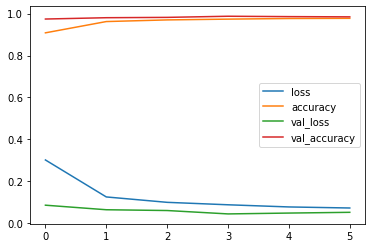

In [28]:
#visulizing the losses and accuracy for number of epochs
losses.plot()

In [29]:
#predicting the test data
prediction_test=model_CNN.predict_classes(x_test_scale)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
#From prediction, the data is 7
prediction_test[0]

7

In [31]:
#actual first data is 7
y_test[0]

7

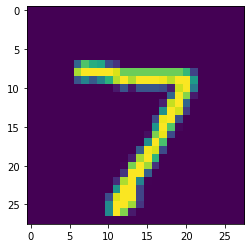

In [32]:
plt.imshow(x_test_scale[0].reshape(28,28))

In [33]:
#Metrics Score
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [35]:
print(pd.crosstab(y_test,prediction_test))

col_0    0     1     2    3    4    5    6     7    8    9
row_0                                                     
0      972     0     1    0    0    0    4     1    0    2
1        0  1131     1    0    0    1    2     0    0    0
2        3     3  1018    0    1    0    2     4    1    0
3        0     0     4  992    0    9    0     1    3    1
4        1     0     0    0  964    0    5     0    3    9
5        2     0     0    4    0  884    1     1    0    0
6        6     2     1    0    2    3  944     0    0    0
7        0     4    12    0    1    0    0  1009    1    1
8        7     0     2    2    2    4    4     6  945    2
9        1     5     0    1    5    6    1     3    0  987


In [36]:
#Accuracy percentage is 99% and CNN has performed really well

In [37]:
#Downloading some random image from the internet and predicting

In [38]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [39]:
# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
# convert to array
    img = img_to_array(img)
#in mnist dataset white is represented as 0 and black as 255
#so the downloaded data is represented as opposite way 0 as black and 255 as white
#So swapping the range
    img=((img-255)*-1)
# reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
# prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [40]:
# load an image and predict the class
def run_example(file_name):
# load the image
    img = load_image(file_name)
        
# predict the class
    digit = model_CNN.predict_classes(img)
    print("Model Predicted: ",digit[0])

Model Predicted:  1

Input Number is: 


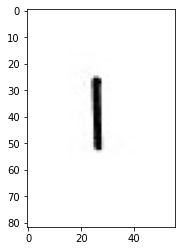

In [69]:
# entry point, run the example
file_name='1.jpg'
run_example(file_name)



from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(file_name)  
  
# This method will show image in any image viewer  
#im.show()  
print("\nInput Number is: ")
plt.imshow(im)


Lets see how to do a image processing using Artificial Neural network

In [42]:
#ANN
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

The points to be noted here is the input shape for a CNN is Number of samples, pixel height, pixel width and number of color channels.
But for a ANN, the input shape should be of number of samples and image size. image size is nothing but pixel height * width * number of color channels.

so, before building a model we need to convert the input shape to number of samples, image size

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
img_size=x_train.shape[1]*x_train.shape[2]
img_size

784

In [45]:
x_train_scale.shape

(60000, 28, 28, 1)

In [46]:
x_train_scale=x_train_scale.reshape(x_train.shape[0],img_size)
x_test_scale=x_test_scale.reshape(x_test.shape[0],img_size)

In [47]:
model_ANN = Sequential()

#Dense layer
model_ANN.add(Dense(units=30,activation='relu',input_dim = img_size))

#Dense layer
model_ANN.add(Dense(units=15,activation='relu',input_dim = img_size))

#Final layer
model_ANN.add(Dense(units=10,activation='softmax'))

model_ANN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_ANN.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 24,175
Trainable params: 24,175
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [50]:
model_ANN.fit(x_train_scale,y_train_cat,epochs=20,callbacks=early_stop,validation_data=(x_test_scale,y_test_cat))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8873 - val_loss: 0.1953 - val_accuracy: 0.9436
Epoch 2/20
1875/1875 [==============================] - 2s 944us/step - loss: 0.1777 - accuracy: 0.9479 - val_loss: 0.1485 - val_accuracy: 0.9550
Epoch 3/20
1875/1875 [==============================] - 2s 945us/step - loss: 0.1426 - accuracy: 0.9574 - val_loss: 0.1388 - val_accuracy: 0.9571
Epoch 4/20
1875/1875 [==============================] - 2s 943us/step - loss: 0.1227 - accuracy: 0.9632 - val_loss: 0.1266 - val_accuracy: 0.9613
Epoch 5/20
1875/1875 [==============================] - 2s 978us/step - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.1197 - val_accuracy: 0.9636
Epoch 6/20
1875/1875 [==============================] - 2s 977us/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.1256 - val_accuracy: 0.9623
Epoch 7/20
1875/1875 [==============================] - 2s 940us/step - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.1160 - v

In [51]:
#Saving the losses and accuracy in a df
losses = pd.DataFrame(model_ANN.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.375418,0.887300,0.195311,0.9436
1,0.177681,0.947900,0.148482,0.9550
2,0.142632,0.957417,0.138752,0.9571
3,0.122743,0.963183,0.126584,0.9613
4,0.107278,0.967617,0.119745,0.9636
5,0.097130,0.970350,0.125633,0.9623
6,0.087971,0.973150,0.115954,0.9659
7,0.081873,0.974483,0.116945,0.9652
8,0.077116,0.976000,0.119208,0.9657


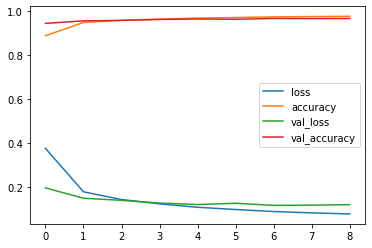

In [52]:
losses.plot()

In [53]:
#Test data prediction
prediction_test=model_ANN.predict_classes(x_test_scale)

In [54]:
prediction_test[0]

7

In [55]:
y_test[0]

7

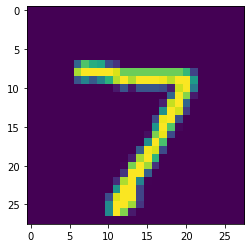

In [56]:
plt.imshow(x_test_scale[0].reshape(28,28))

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.95      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [59]:
print(pd.crosstab(y_test,prediction_test))

col_0    0     1     2    3    4    5    6    7    8    9
row_0                                                    
0      969     0     0    2    2    1    2    1    2    1
1        0  1115     4    4    0    1    2    2    7    0
2        3     1  1009    7    3    0    1    4    3    1
3        0     1     9  983    0    0    0    4   11    2
4        2     1     6    1  933    0    4    6    7   22
5        5     1     0   17    4  847    8    2    7    1
6       13     2     0    0    6   11  922    0    4    0
7        1     5    18    6    1    1    0  988    2    6
8        6     0     5   15    6    5    1    5  928    3
9        2     2     0   10    6    4    1    9   12  963


In [60]:
#Downloading some random image from the internet and predicting

In [61]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [62]:
# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
# convert to array
    img = img_to_array(img)
#in mnist dataset white is represented as 0 and black as 255
#so the downloaded data is represented as opposite way 0 as black and 255 as white
#So swapping the range
    img=((img-255)*-1)
# reshape into a single sample with 1 channel
    img = img.reshape(1, 784)
# prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [63]:
# load an image and predict the class
def run_example(file_name):
# load the image
    img = load_image(file_name)
    
# load model
#    model = load_model('final_model.h5')
# predict the class
    digit=[]
    digit = model_ANN.predict_classes(img)
    print("Model Predicted: ",digit[0])

Model Predicted:  9

Input Number is: 


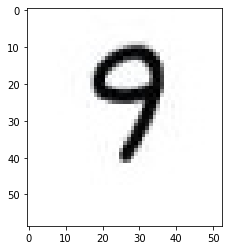

In [67]:
# entry point, run the example
file_name='9.jpg'
run_example(file_name)



from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(file_name)  
  
# This method will show image in any image viewer  
#im.show()  
print("\nInput Number is: ")
plt.imshow(im)


I hope, now you have learnt how to solve image processing problem using the Artificial Neural Networks.
Please comment if you have any queries
Happy learning!